Sample Data:
   author_popularity  book_length  num_keywords    genre
0          41.052297          776             5  mystery
1          48.950098          674             5  mystery
2           2.323401          633            19  fantasy
3          41.564184          169            12  mystery
4          65.129649          992            18  fantasy

Column Names: ['author_popularity', 'book_length', 'num_keywords', 'genre']

Accuracy: 0.3333333333333333
Precision (macro): 0.3901960784313726
Recall (macro): 0.31547619047619047

Classification Report:
              precision    recall  f1-score   support

     fantasy       0.20      0.14      0.17         7
     fiction       0.67      0.33      0.44         6
     mystery       0.29      0.50      0.37        10
 non-fiction       0.40      0.29      0.33         7

    accuracy                           0.33        30
   macro avg       0.39      0.32      0.33        30
weighted avg       0.37      0.33      0.33        30



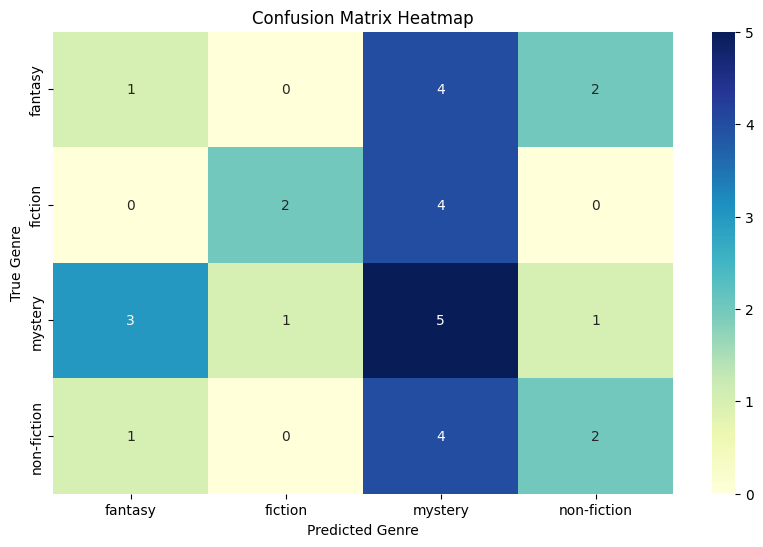

In [20]:
# Step 1: Install Required Packages (Run this only in Google Colab)
!pip install scikit-learn matplotlib seaborn pandas

# Step 2: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score

# Step 3: Load Dataset (Upload manually if not using this file system)
file_path = '/content/book_genres.csv'  # Replace with uploaded path in Colab
df = pd.read_csv(file_path)

# Step 4: Check Data
print("Sample Data:")
print(df.head())
print("\nColumn Names:", df.columns.tolist())

# Step 5: Define Features and Label
# Define features and label based on actual column names
X = df[['author_popularity', 'book_length', 'num_keywords']]
y = df['genre']


# Step 6: Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('popularity', OneHotEncoder(handle_unknown='ignore'), ['author_popularity']),
        ('length', StandardScaler(), ['book_length']),
        ('keywords', StandardScaler(), ['num_keywords'])  # Use StandardScaler for numeric data
    ]
)


# Step 7: Build Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Step 8: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Step 9: Train Model
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Step 10: Evaluation Metrics
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))

# Step 11: Detailed Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 12: Confusion Matrix Heatmap
conf_matrix = confusion_matrix(y_test, y_pred, labels=pipeline.classes_)

plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=pipeline.classes_, yticklabels=pipeline.classes_)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Genre')
plt.ylabel('True Genre')
plt.show()
